In [1]:
!nvidia-smi

Thu Aug 15 20:54:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q supervision roboflow

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135.7/135.7 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.8/78.8 kB 6.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54.5/54.5 kB 2.6 MB/s eta 0:00:00


In [4]:
!pip install --upgrade ultralytics

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.3/41.3 kB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 869.0/869.0 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


## Download dataset from Roboflow Universe

In [5]:
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="pyJdTQUxOgmebewY8nb3")
project = rf.workspace("divya-lzcld").project("taco-mqclx")
version = project.version(3)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TACO-3 in yolov9:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12020/12020 [00:02<00:00, 5342.52it/s]


In [6]:
import ultralytics
print(ultralytics.__version__)

8.2.78


## Custom Training

In [1]:
from ultralytics import YOLO

# Load a YOLOv10 model configuration
model = YOLO('yolov10n.pt')  # build a new model from YAML

# Train the model
results = model.train(data='/content/TACO-3/data.yaml', epochs=10, imgsz=640, batch=32, plots=True)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.59M/5.59M [00:00<00:00, 6.31MB/s]


New https://pypi.org/project/ultralytics/8.3.20 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.77  Python-3.9.0 torch-2.0.1+cpu CPU (Intel Core(TM) i5-9300H 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/TACO-3/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

RuntimeError: Dataset '/content/TACO-3/data.yaml' error  '/content/TACO-3/data.yaml' does not exist

In [9]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [10]:
%cd {HOME}

/content


In [11]:
from IPython.display import Image

/content


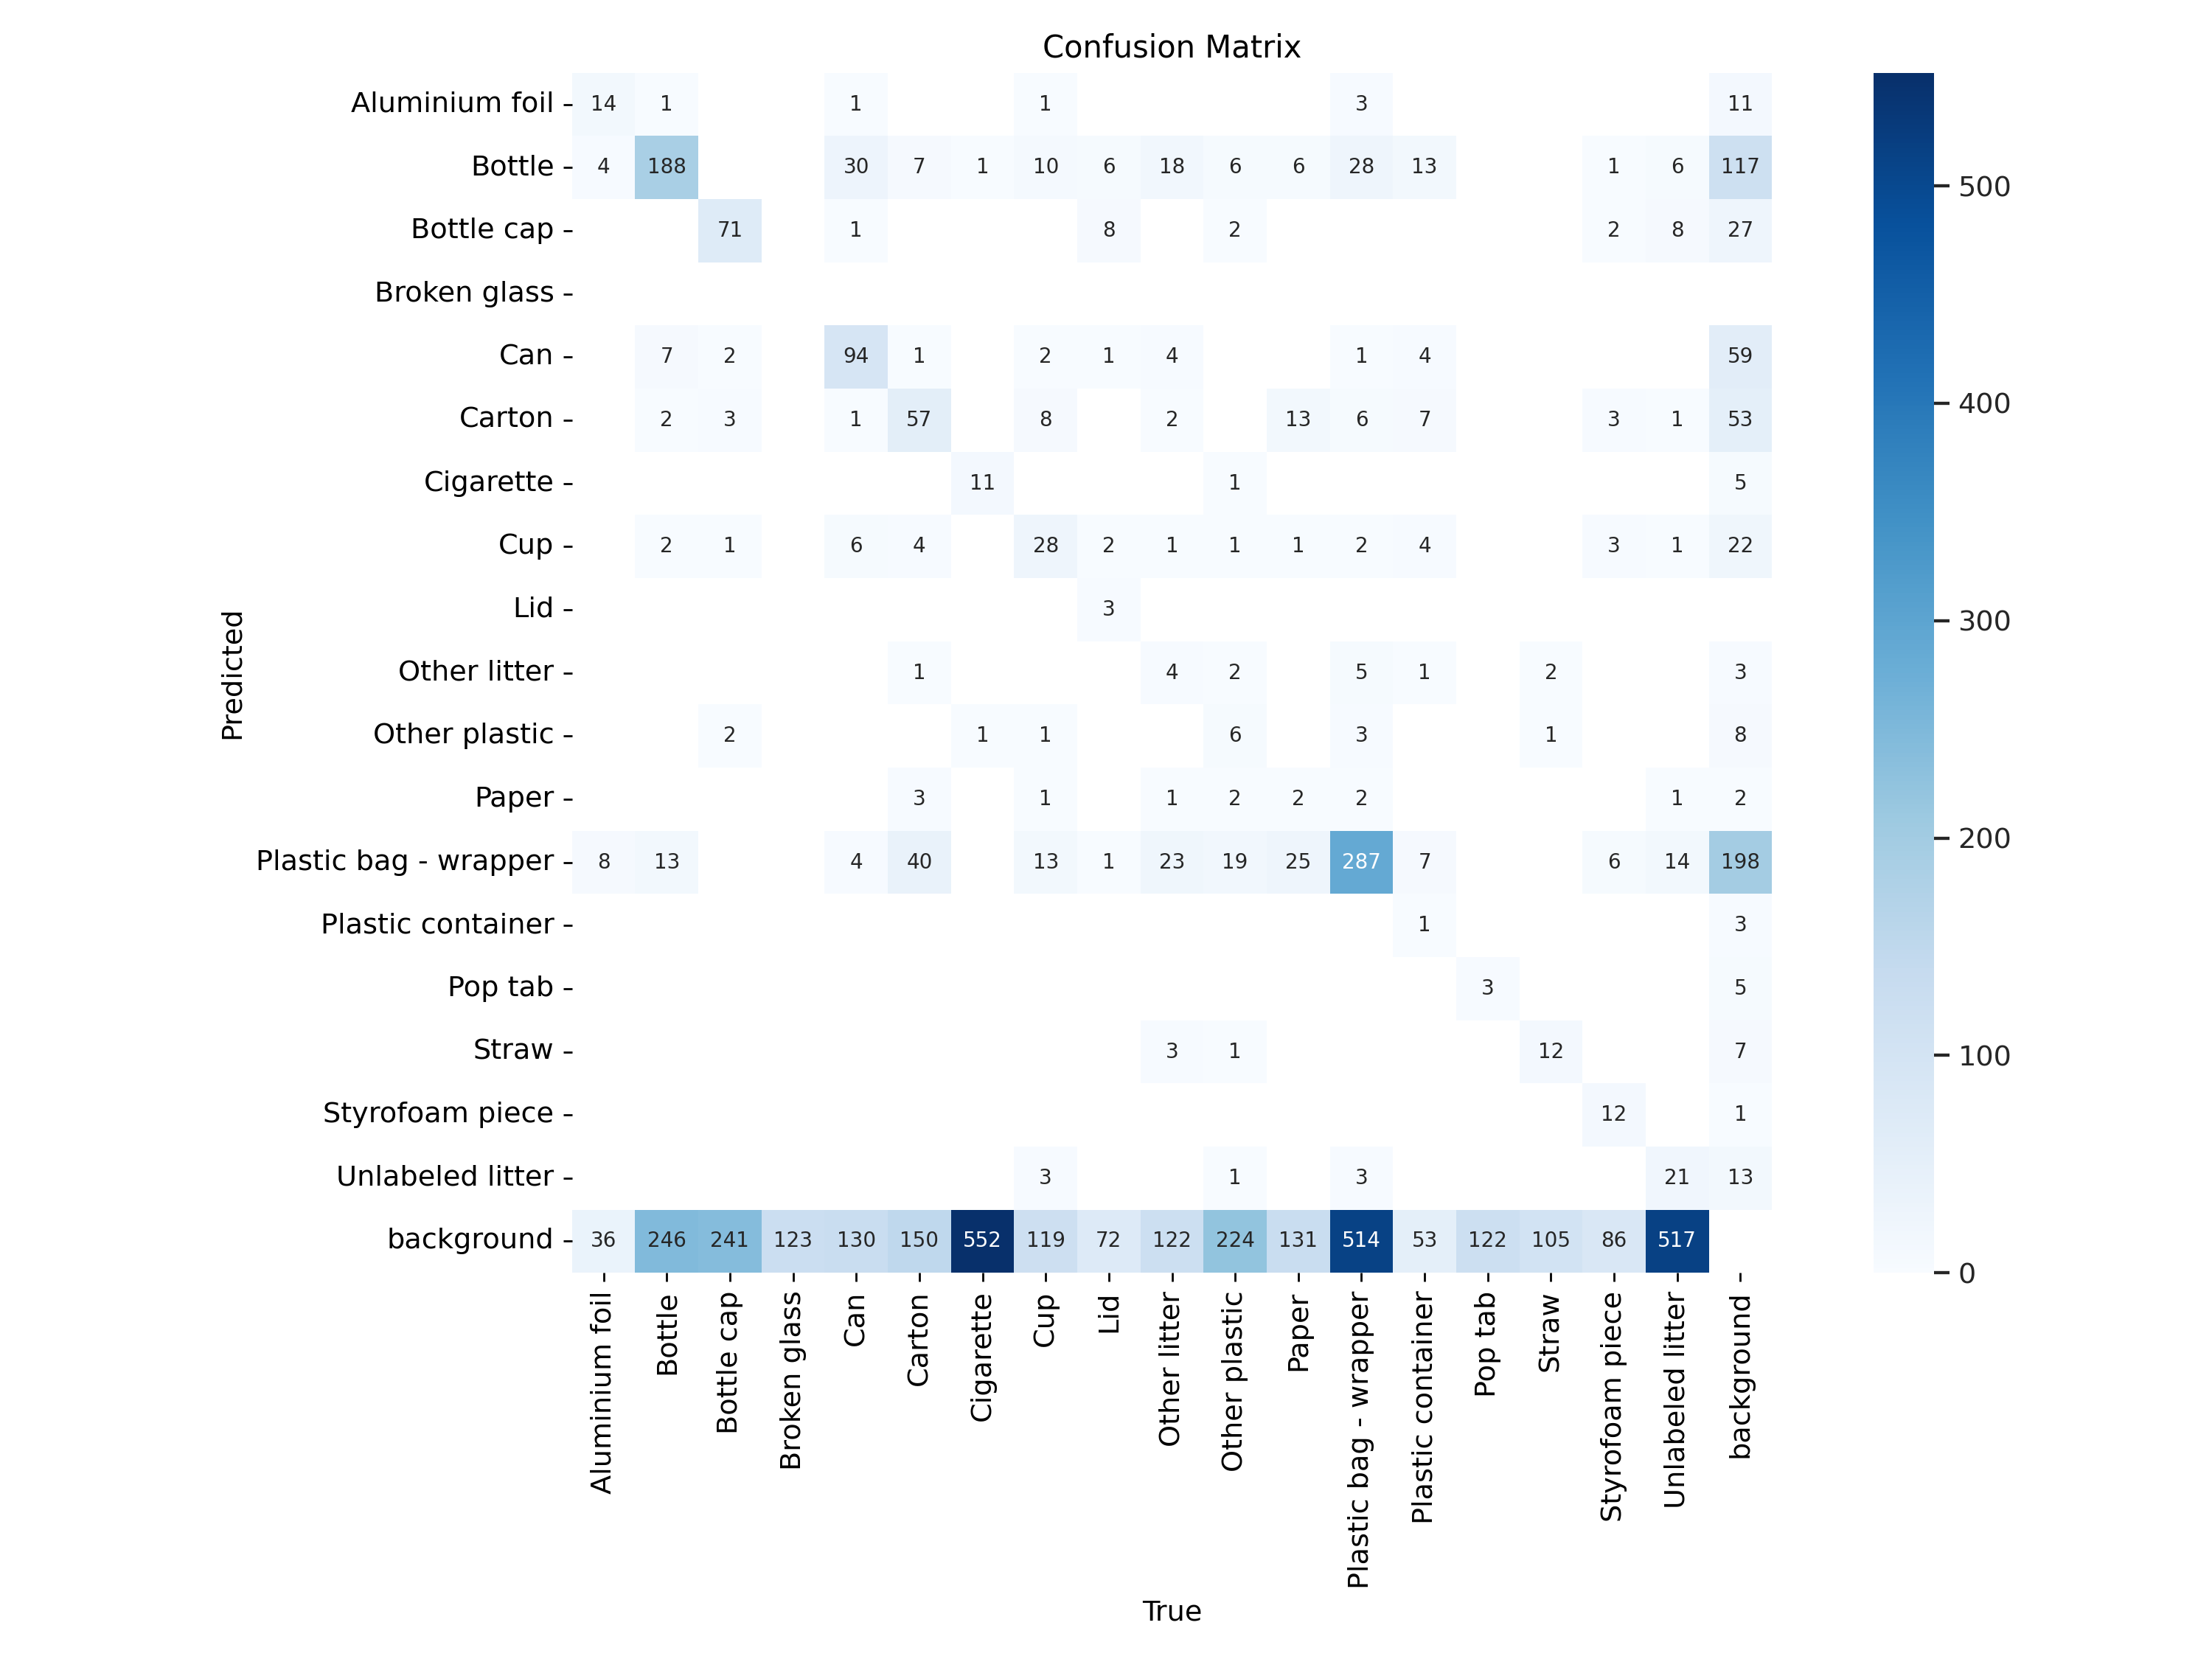

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


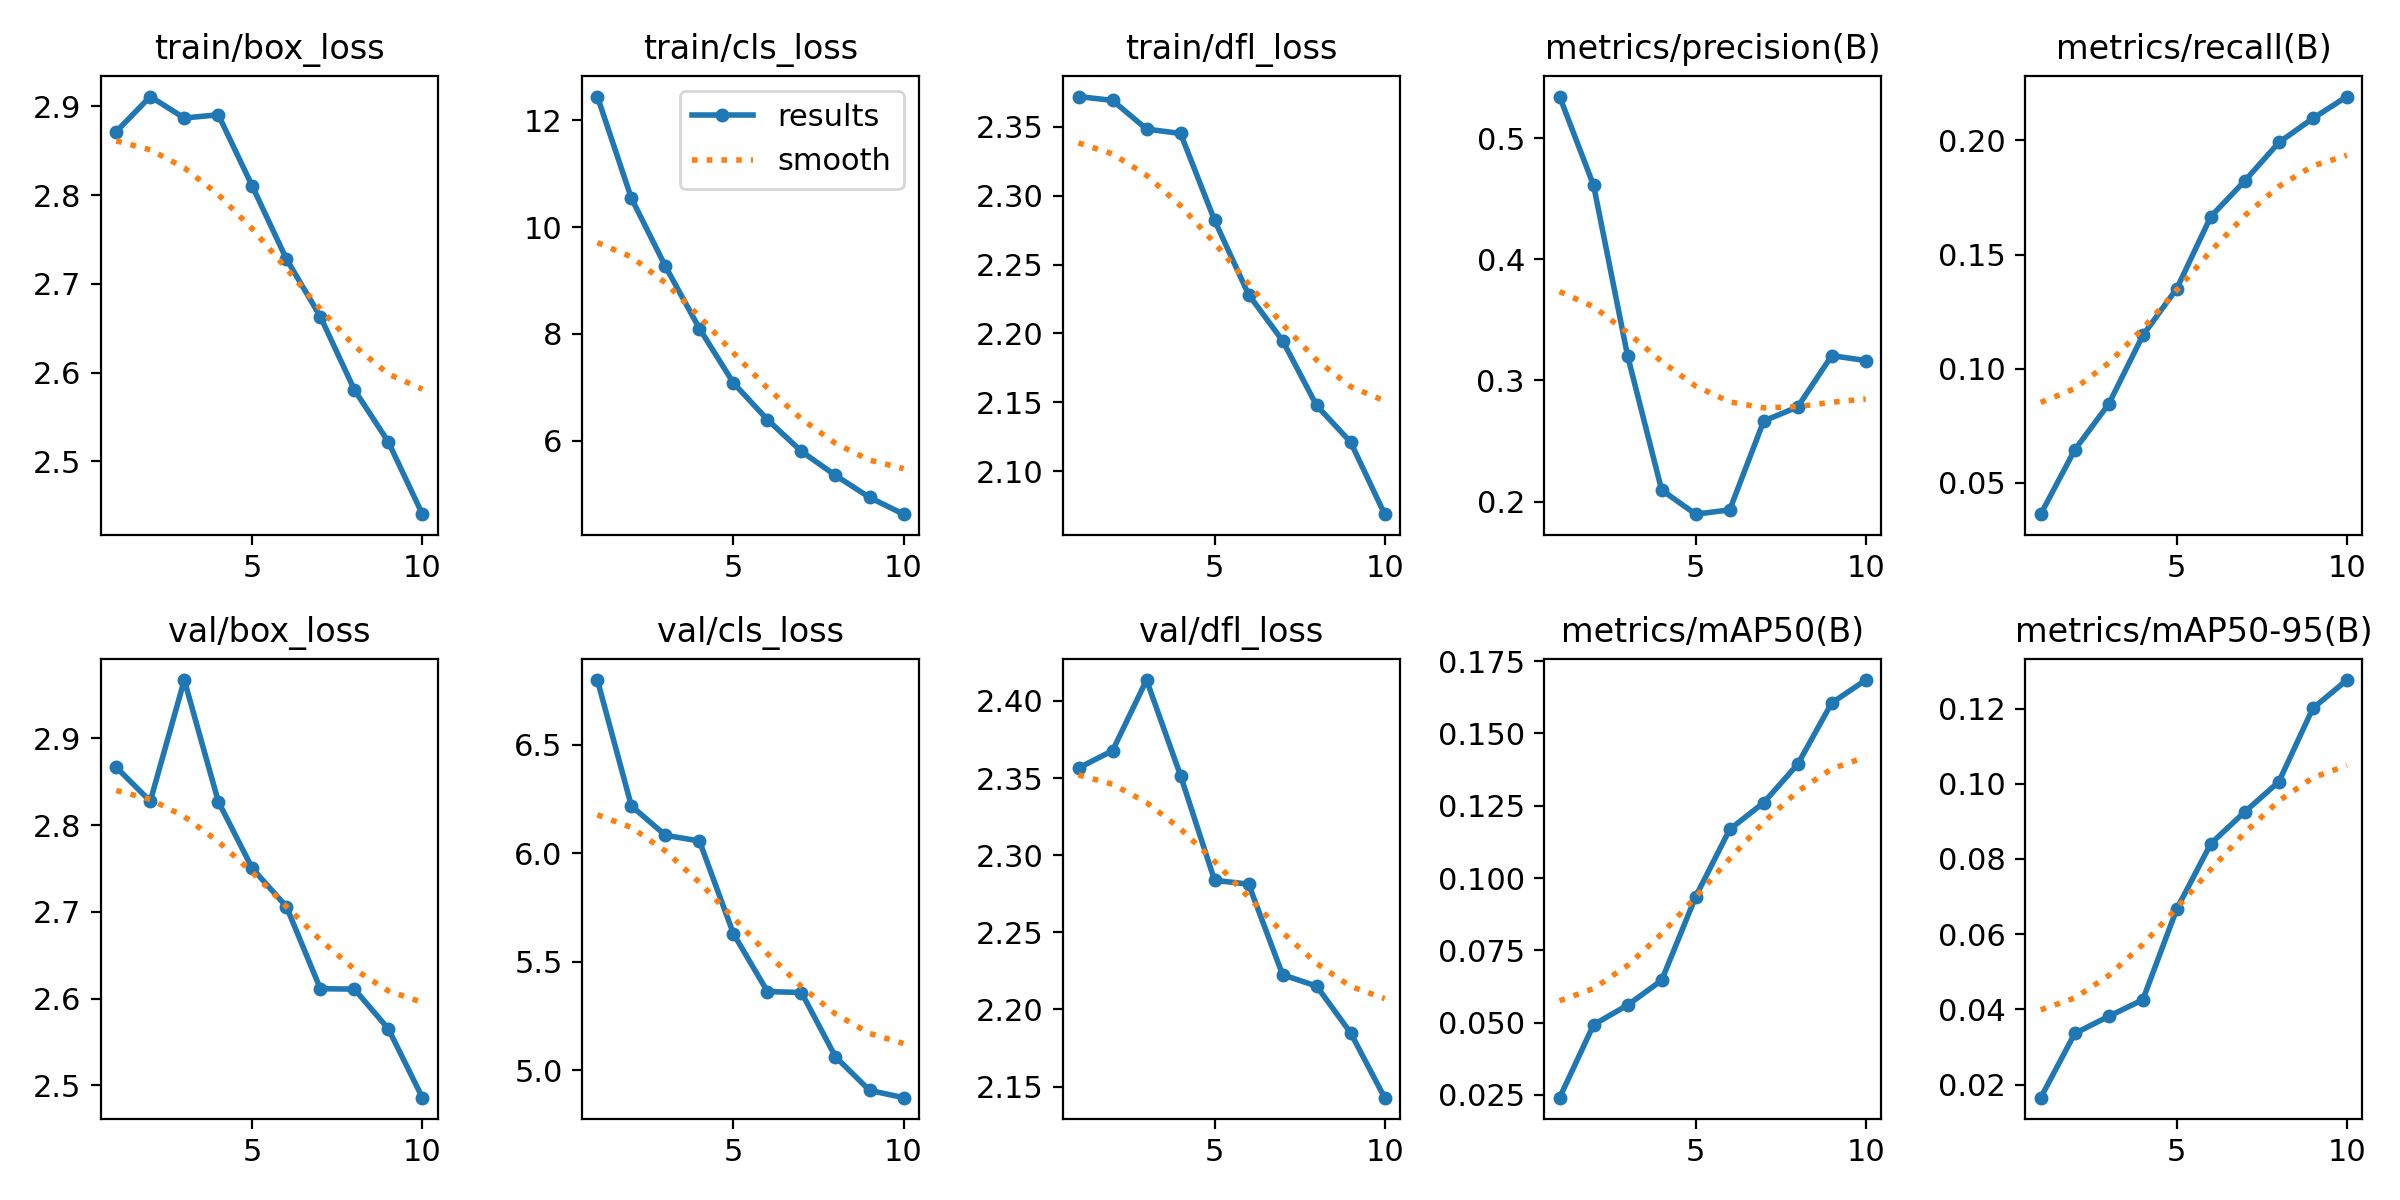

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [16]:
import ultralytics
print(ultralytics.__version__)

8.2.78


In [17]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Validate the model
metrics = model.val()
print(metrics.box.map)  # mAP50-95

Ultralytics YOLOv8.2.78 üöÄ Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,701,436 parameters, 0 gradients, 8.3 GFLOPs


val: Scanning /content/TACO-3/valid/labels.cache... 1704 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1704/1704 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 107/107 [00:21<00:00,  5.01it/s]


                   all       1704       4830      0.318       0.22      0.169      0.127
        Aluminium foil         48         62      0.283      0.339      0.259      0.222
                Bottle        347        459      0.278      0.571      0.377      0.282
            Bottle cap        275        320      0.388      0.356      0.287      0.188
          Broken glass         13        123          1          0          0          0
                   Can        187        267      0.394      0.513       0.44      0.349
                Carton        207        263      0.278      0.407      0.256      0.204
             Cigarette        223        565      0.252     0.0496     0.0493     0.0189
                   Cup        162        186      0.284      0.366       0.23      0.181
                   Lid         82         93      0.222     0.0707     0.0942     0.0754
          Other litter        148        178      0.204      0.107     0.0739     0.0602
         Other plasti

In [19]:
from ultralytics import YOLO

import supervision as sv

model = YOLO(f'{HOME}/runs/detect/train2/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


**NOTE:** Let's randomly select an image from our validation set and visualize the results.

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.


<class 'numpy.ndarray'>

0: 640x640 1 Carton, 1 Plastic bag - wrapper, 19.4ms
Speed: 5.6ms preprocess, 19.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


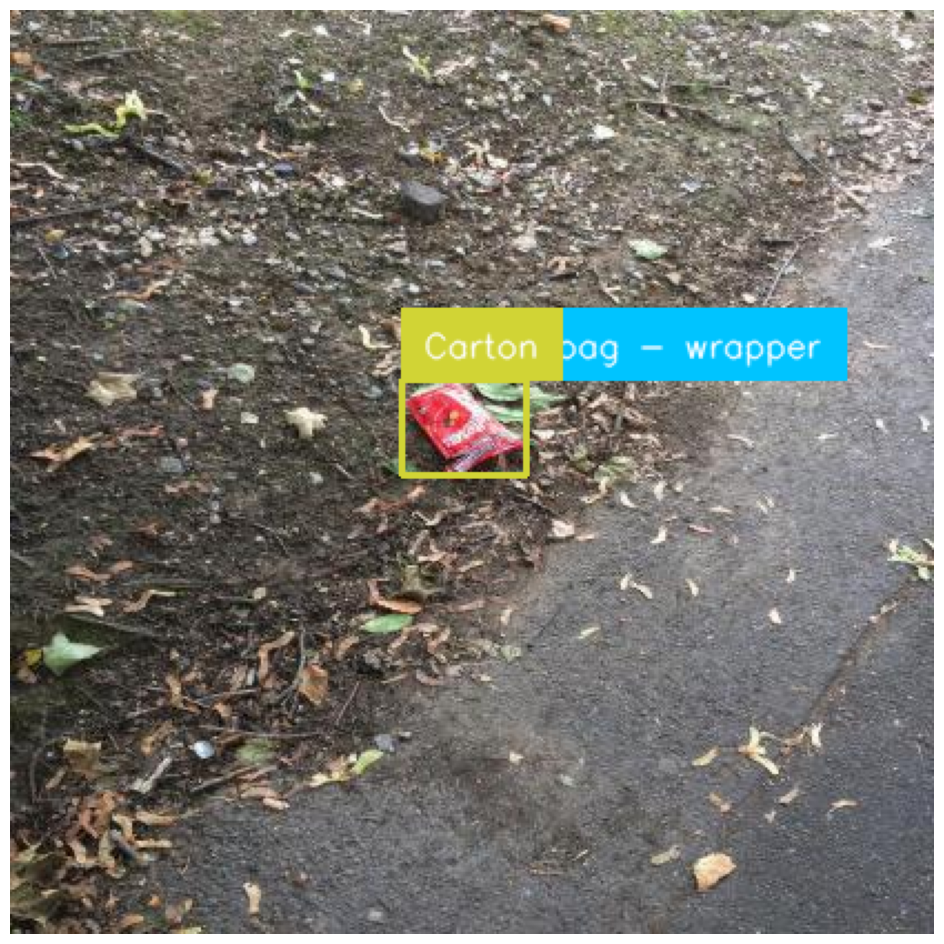

In [26]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]
print(type(random_image))

results = model(source=random_image, conf=0.15)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)


0: 448x640 1 Bottle, 2 Cartons, 1 Cup, 2 Papers, 1 Plastic bag - wrapper, 1 Styrofoam piece, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Detections(xyxy=array([[     275.24,      196.98,      343.45,      245.43],
       [     398.42,      183.25,      606.16,      325.67],
       [     275.83,      196.69,      343.86,      246.38],
       [     275.24,      196.98,      343.45,      245.43],
       [     275.24,      196.98,      343.45,      245.43],
       [     275.24,      196.98,      343.45,      245.43],
       [     275.83,      196.69,      343.86,      246.38],
       [     275.83,      196.69,      343.86,      246.38]], dtype=float32), mask=None, confidence=array([    0.46454,     0.28265,     0.18359,     0.18266,     0.13718,    0.056254,    0.053425,    0.052953], dtype=float32), class_id=array([ 5,  1,  5, 12,  7, 11, 16, 11]), tracker_id=None, data={'class_name': array(['Carton', 'Bottle', 'Carton', 'Plasti

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


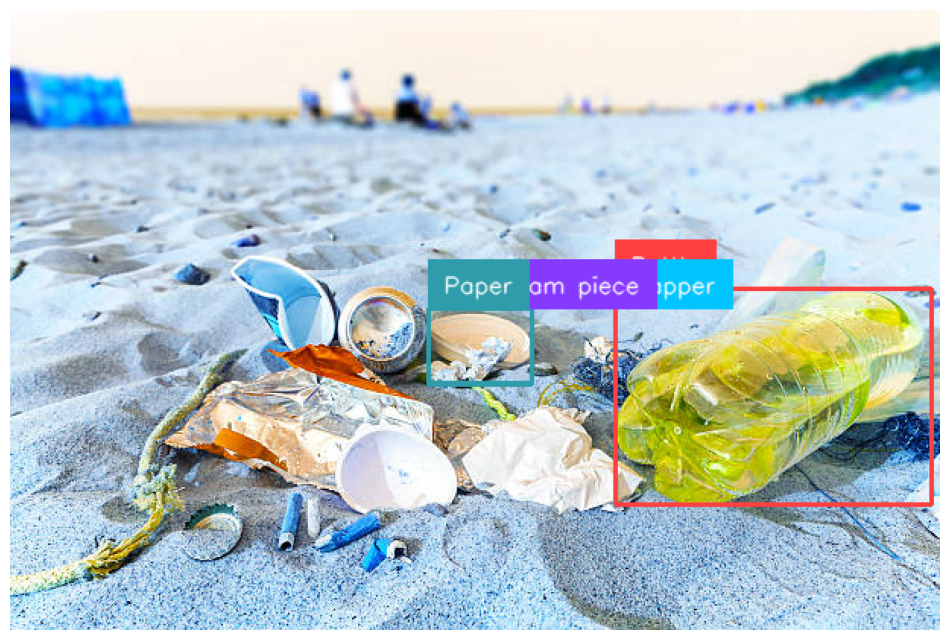

In [33]:
import numpy as np
from ultralytics import YOLO
import cv2
import supervision as sv

# Load the trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Path to the image
image_path = '/content/istockphoto-480409172-612x612.jpg'

# Read the image using cv2
image_array = cv2.imread(image_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Predict on the image
# # results = model(source=random_image, conf=0.15)[0]
results = model(image_array, conf=0.05)
results[0].show()

# Create Detections object
detections = sv.Detections.from_ultralytics(results[0])
print(detections)

# Create annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Annotate the image
annotated_image = bounding_box_annotator.annotate(
    scene=image_array, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Plot the annotated image
sv.plot_image(annotated_image)